# KNN 알고리즘으로 고객이탈을 예측

## KNN(K - Nearest Neighbors)

- KNN, K-최근접 이웃 알고리즘은 특정공간내에서 입력과 제일 근접한 k개의 요소를 찾아, 더 많이 일치하는 것으로 분류하는 알고리즘입니다.
- KNN(k-Nearest Neighbors) 알고리즘은 지도학습(Supervised Learnling)의 한 종류로서, 이름에서도 알 수 있듯이 최근접한 이웃을 찾아 분류작업을 하는 알고리즘이다. 최근접 이웃을 찾기 위해 유클리드(Euclidean distance) 거리가 사용되며, 가장 가까운 거리일 수 록 ,가장 유사한 범주에 속한다고 할 수 있다.

- KNN 기계학습은
-- 개인별 영화 추천
-- 이미지/비디오에서 얼굴과 글자 인식
-- 유전자 데이터 패턴 인식(종양 식별)
등에서 적용되고 있으며, 단순한 알고리즘이기 때문에 구현하기 어렵지 않다

- Non parametric  => 비모수 통계학이란 모집단의 분포를 가정하지 않고, 오직   데이터를 통해서만 데이터를 검정하는 방법을 의미한다
- 느리다는 단점
- only output



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('churn.csv')

In [9]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [10]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
pd.set_option('display.max_columns',30) #모든 컬럼 보게 해줌

In [12]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
pd.set_option('display.max_rows',100)

In [14]:
data.head(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges 타입이 object 이므로 바꿔줘야한다

In [16]:
pd.to_numeric(data['TotalCharges'])

ValueError: Unable to parse string " " at position 488

ValueError: Unable to parse string " " at position 488
오류 잡기

In [17]:
data.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [18]:
my_string = 'hi hi hi'

In [19]:
my_string.replace(" ","")

'hihihi'

#공백 제거하기

In [20]:
data['TotalCharges'] = data['TotalCharges'].replace(" ","")

In [21]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges']) #pd.to_numeric() 함수를 이용한 문자열 칼럼의 숫자형 변환

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges 객체 float64 으로 바뀜

In [23]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


C:\Users\MyCom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

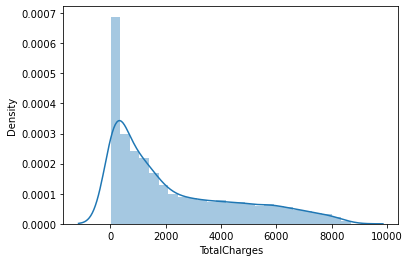

In [24]:
sns.distplot(data['TotalCharges'])

# 카테고리 변수 처리 

In [25]:
data['gender'].nunique()

2

## 모든 데이터를 수치로 변환해주는 전처리 작업
### 1️⃣ 먼저 수치형 데이터로 변환을 해주고 (0,1,2,3,...)

### 2️⃣ 그다음 수치화된 데이터를 가변수화하여 나타내 준다면




### 판다스(pandas)에서는 손쉽게 더미의 가변수를 만들 수 있도록 get_dummies함수를 제공하고 있다.


#### 💡pd.get_dummies() 사용법

##### 0️⃣ 먼저, 사용할 예시 데이터 프레임을 생성 (이미 가지고 있는 데이터프레임이 있다면 이 과정은 생략)

##### 1️⃣  pd.get_dummies 처리 : 결측값을 제외하고 0과 1로 구성된 더미값이 만들어진다.

##### 2️⃣ 결측값 처리(dummy_na = True 옵션) :  Nan을 생성하여 결측값도 인코딩하여 처리해준다.


In [26]:
pd.get_dummies(data, columns=['gender'], drop_first= True)
# gender_Male, gender_Female 둘중에 하나만 있으면 되므로 drop_first = true 를 사용함

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male
0,7590-VHVEG,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,1
7039,2234-XADUH,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0
7040,4801-JZAZL,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,8361-LTMKD,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1


In [27]:
data['gender'].dtype == 'O'

True

In [28]:
col_list = []

In [29]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
for i in data.columns:
    if data[i].dtype == 'O': #data type이 object이면 col_list에 넣어준다
        col_list.append(i)

- 2   SeniorCitizen     7043 non-null   int64  
- 5   tenure            7043 non-null   int64  
- 18  MonthlyCharges    7043 non-null   float64
- 19  TotalCharges      7032 non-null   float64
- 위의 4가지 제거 해주고 object 객체들만 리스트에 넣어줌    

In [31]:
col_list

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [32]:
print('a', 'b')

a b


In [33]:
for i in col_list:
    print(i, data[i].nunique())

customerID 7043
gender 2
Partner 2
Dependents 2
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
Churn 2


- customerID 객체만 빼고 list 처리해줌

In [34]:
col_list = col_list[1:]

In [35]:
col_list

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [36]:
data = pd.get_dummies(data, columns=col_list, drop_first = True)

- 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn'
- 모두 object 객체들 0,1 으로 변환됨

In [37]:
data

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,1,1,1,1,0,1,0,0,0,1,...,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0
7039,2234-XADUH,0,72,103.20,7362.90,0,1,1,1,0,1,1,0,0,0,...,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0
7040,4801-JZAZL,0,11,29.60,346.45,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7041,8361-LTMKD,1,4,74.40,306.60,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [38]:
data.isna().sum()
# isna() -> Whether each element in the DataFrame is contained in values.
#missing value 값 확인 => isna()


customerID                                0
SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                 

In [39]:
data['TotalCharges'].mean()

2283.3004408418697

In [40]:
data['TotalCharges'].median()

1397.475

C:\Users\MyCom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

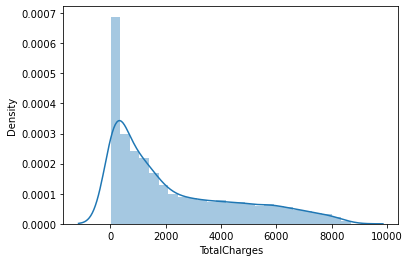

In [41]:
sns.distplot(data['TotalCharges'])

- mean값과 median값이 차이가 심하므로 median값을 써준다
- 0값으로 데이터가 많이 있으므로 median값을 써준다

In [42]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())
# DataFrame.fillna()메서드로DataFrame의 모든NaN 값 채우기

In [43]:
data.isna().sum()

customerID                               0
SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

# 스케일링의 종류

## Scikit-Learn에서는 다양한 종류의 스케일러를 제공하고 있다. 그중 대표적인 기법들이다.

### 1	StandardScaler	기본 스케일. 평균과 표준편차 사용
### 2	MinMaxScaler	최대/최소값이 각각 1, 0이 되도록 스케일링
### 3	MaxAbsScaler	최대절대값과 0이 각각 1, 0이 되도록 스케일링
### 4	RobustScaler	중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [45]:
mixmax = MinMaxScaler()

In [46]:
data.drop('customerID', axis=1, inplace = True)

In [47]:
data.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [48]:
mixmax.fit(data)

MinMaxScaler()

In [49]:
scaled_data = mixmax.transform(data)

- DataFrame.transform()는DataFrame에 함수를 적용하고 DataFrame을 변환합니다. 적용 할 함수는transform()함수에 매개 변수로 전달됩니다. 변환 된DataFrame은 원래DataFrame과 동일한 축 길이를 가져야합니다.

In [50]:
data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [51]:
pd.DataFrame(scaled_data, columns = data.columns)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,0.013889,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.472222,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.027778,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.0,0.625000,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.015330,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.333333,0.662189,0.227521,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7039,0.0,1.000000,0.845274,0.847461,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7040,0.0,0.152778,0.112935,0.037809,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,1.0,0.055556,0.558706,0.033210,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


- MinMaxScaler 적용한 결과

In [52]:
standard = StandardScaler()

In [53]:
standard.fit(data.drop('Churn_Yes', axis=1))

StandardScaler()

- axis=0(index)은 행을 따라 동작합니다. 각 컬럼의 모든 행에 대해서 작용합니다. 
- axis=1(columns)은 열을 따라 동작합니다.

In [54]:
scaled_st = standard.transform(data.drop('Churn_Yes', axis=1))

In [55]:
pd.DataFrame(scaled_st, columns = data.drop('Churn_Yes', axis=1).columns)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,-1.277445,-1.160323,-0.994242,-1.009559,1.034530,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,-0.633933,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
1,-0.439916,0.066327,-0.259629,-0.173244,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.796070,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513
2,-0.439916,-1.236724,-0.362660,-0.959674,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513
3,-0.439916,0.514251,-0.746535,-0.194766,0.990532,-0.966622,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,1.563872,-0.525927,-0.790132,-0.525927,-0.796070,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807
4,-0.439916,-1.236724,0.197365,-0.940470,-1.009559,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,1.129102,-0.525927,-0.525927,-0.633933,-0.525927,-0.725563,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.128655,0.990532,1.034530,1.529024,0.327438,-0.327438,1.170719,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,1.563872,-0.525927,1.265612,-0.525927,1.256171,1.944582,-0.562975,0.829798,-0.525047,-0.711026,1.835513
7039,-0.439916,1.613701,1.277533,2.243151,-1.009559,1.034530,1.529024,0.327438,-0.327438,1.170719,1.129102,-0.525927,-0.525927,-0.633933,-0.525927,1.378241,-0.525927,1.381277,-0.525927,-0.639439,-0.525927,1.265612,-0.525927,1.256171,1.944582,-0.562975,0.829798,1.904590,-0.711026,-0.544807
7040,-0.439916,-0.870241,-1.168632,-0.854469,-1.009559,1.034530,1.529024,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
7041,2.273159,-1.155283,0.320338,-0.872062,0.990532,1.034530,-0.654012,0.327438,-0.327438,1.170719,1.129102,-0.525927,-0.525927,-0.633933,-0.525927,-0.725563,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513


- 종속변수 Churn_Yes는 빼고 스케일 해준다
- 종속변수는 영향을 받지 않고 그대로 반영되어야 하기 때문에 data.drop('Churn_Yes', axis=1) 해준다

In [56]:
rob = RobustScaler()

In [57]:
rob.fit(data.drop('Churn_Yes', axis=1))

RobustScaler()

In [58]:
scaled_rob = rob.transform(data.drop('Churn_Yes', axis=1))

In [59]:
pd.DataFrame(scaled_rob, columns = data.drop('Churn_Yes', axis=1).columns)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,-0.608696,-0.745170,-0.404100,-1.0,1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.108696,-0.246550,0.145381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,1.0
2,0.0,-0.586957,-0.303588,-0.380964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.347826,-0.516099,0.130977,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0
4,0.0,-0.586957,0.006440,-0.368111,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,-0.108696,0.265869,0.175224,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0.0,0.934783,0.604416,1.762637,-1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0.0,-0.391304,-0.749770,-0.310552,-1.0,1.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1.0,-0.543478,0.074517,-0.322327,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


- RobustScaler 적용한 결과

In [60]:
scaled_data = pd.DataFrame(scaled_data, columns= data.columns)

# 훈련세트와 테스트세트로 분리
- 머신러닝은 훈련 과정과 테스트 과정 두가지로 분리된다.
- 훈련세트를 가지고 예측모델을 훈련시킨 다음에 테스트세트로 훈련 성과를 판단한다.
- sklearn.model_selection.train_test_split() 함수를 사용하면 편리하게 나눌 수 있다.
- train_test_split() 함수는 기본값으로 훈련세트를 75%, 테스트세트를 25% 로 나눈다.


- 데이터 세트 분리는 sklearn에서 train_test_split을 통해 손쉽게 할 수 있다.

- 데이터 세트를 나누는 비율을 지정할 수도 있는데 기본 값은 0.75:0.25, 즉 3:1이다. 3으로 학습해서 1로 시험보는 거다. 만약 비율을 바꾸고 싶다면 test_size의 값만 0에서 1사이로 넣어주면 된다. test_size = 0.2 이렇게.
- random_state라는 파라미터도 있다. 데이터 세트를 나눌 때 난수를 바탕으로   무작위로 나누게 되는데, 이때 난수의 초기값을 고정시켜 주는 기능이다.    random_state = 100 이라고 지정해놓았으니, 나중에도 이렇게 적어주면 이 실험 결과를 재현할 수 있다. (안 그러면 돌릴 때마다 매번 다르게 나눠줄 거다.)

In [61]:
from sklearn.model_selection import train_test_split## train, test 데이터 분할
#09 knn 모델 만들기 

In [62]:
X = scaled_data.drop('Churn_Yes', axis=1)
y = scaled_data['Churn_Yes']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=100)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier(n_neighbors=10)

In [68]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [70]:
pred = knn.predict(X_test)

In [74]:
{'key1' : 'apple', 'key2' : [1,2,3]}

{'key1': 'apple', 'key2': [1, 2, 3]}

In [77]:
pd.DataFrame({'actual_value' : y_test, 'pred_value' : pred }).head(30)

,actual_value,pred_value
4880,0.0,0.0
1541,0.0,0.0
1289,0.0,0.0
5745,0.0,0.0
4873,0.0,0.0
4168,0.0,0.0
1557,0.0,0.0
2892,0.0,0.0
664,0.0,0.0
1588,0.0,0.0


In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix 

In [80]:
accuracy_score(y_test, pred)  #75퍼정도 정확도를 보여줌 

0.7581637482252721

- confusion_matrix(real, prediction)  #confusion matrix 표시
- matrix를 2x2 로 나누어서 각각   TN / FP / FN / TP  로 표시하겠습니다. 
  여기서 뒤의 P 와 N 의 의미는 예측을  Positive 로 했는지, Negative 로 했   는지를 의미하고,  앞쪽의 T 와 F 는   예측이 맞았는지, 틀렸는지를 의미합   니다.

In [82]:
confusion_matrix(y_test, pred) #0,1 확인해서 에러 확인 하기 /에러가 은근히 많다

array([[1353,  194],
       [ 317,  249]], dtype=int64)

In [86]:
error_list = []

In [88]:
for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_list.append(accuracy_score(y_test, pred))

<AxesSubplot:>

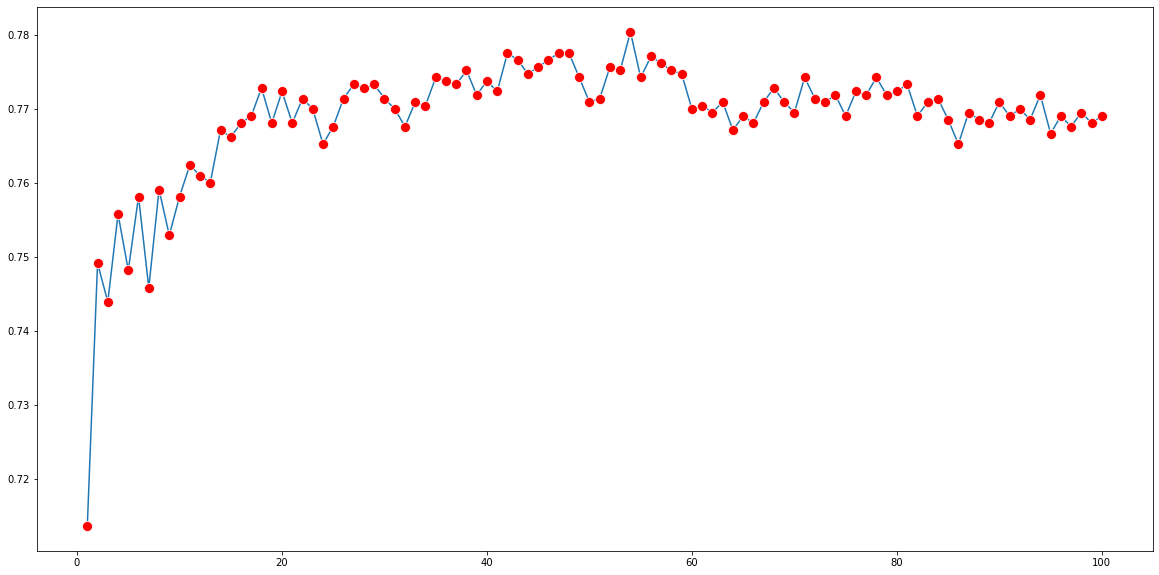

In [96]:
plt.figure(figsize=(20,10))
sns.lineplot(x = range(1,101), y = error_list, marker = 'o', markersize=10, markerfacecolor = 'red')

In [97]:
max(error_list)

0.780407004259347

In [99]:
error_list.index(max(error_list))

53

In [102]:
np.array(error_list).argmax() # 실제 index 는 54임 

53

In [103]:
error_list[0] # for i in range(1,101): 

0.7136772361571225

In [104]:
knn = KNeighborsClassifier(n_neighbors= 54)

In [106]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=54)

In [107]:
pred = knn.predict(X_test)

In [108]:
accuracy_score(y_test, pred)

0.780407004259347

In [109]:
confusion_matrix(y_test,pred)

array([[1332,  215],
       [ 249,  317]], dtype=int64)